In [20]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [14]:
goog_hist = pd.read_csv('Lai_Historical_Data.csv')
goog_hist['Date'] = pd.to_datetime(goog_hist['Date'],utc=True)
goog_hist = goog_hist.set_index('Date')
goog_hist.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 05:00:00+00:00,15.614785,15.678545,15.547291,15.609804,78169752,0.0,0.0
2010-01-05 05:00:00+00:00,15.620515,15.636953,15.480045,15.541064,120067812,0.0,0.0
2010-01-06 05:00:00+00:00,15.587637,15.587637,15.101972,15.149293,158988852,0.0,0.0
2010-01-07 05:00:00+00:00,15.177686,15.192631,14.760512,14.796625,256315428,0.0,0.0
2010-01-08 05:00:00+00:00,14.744323,15.024515,14.672344,14.993881,188783028,0.0,0.0
2010-01-11 05:00:00+00:00,15.054651,15.054651,14.795130,14.971216,288227484,0.0,0.0
2010-01-12 05:00:00+00:00,14.885041,14.897743,14.644699,14.706466,193937868,0.0,0.0
2010-01-13 05:00:00+00:00,14.358032,14.654163,14.293526,14.622035,259604136,0.0,0.0
2010-01-14 05:00:00+00:00,14.542584,14.799116,14.515437,14.690775,169434396,0.0,0.0


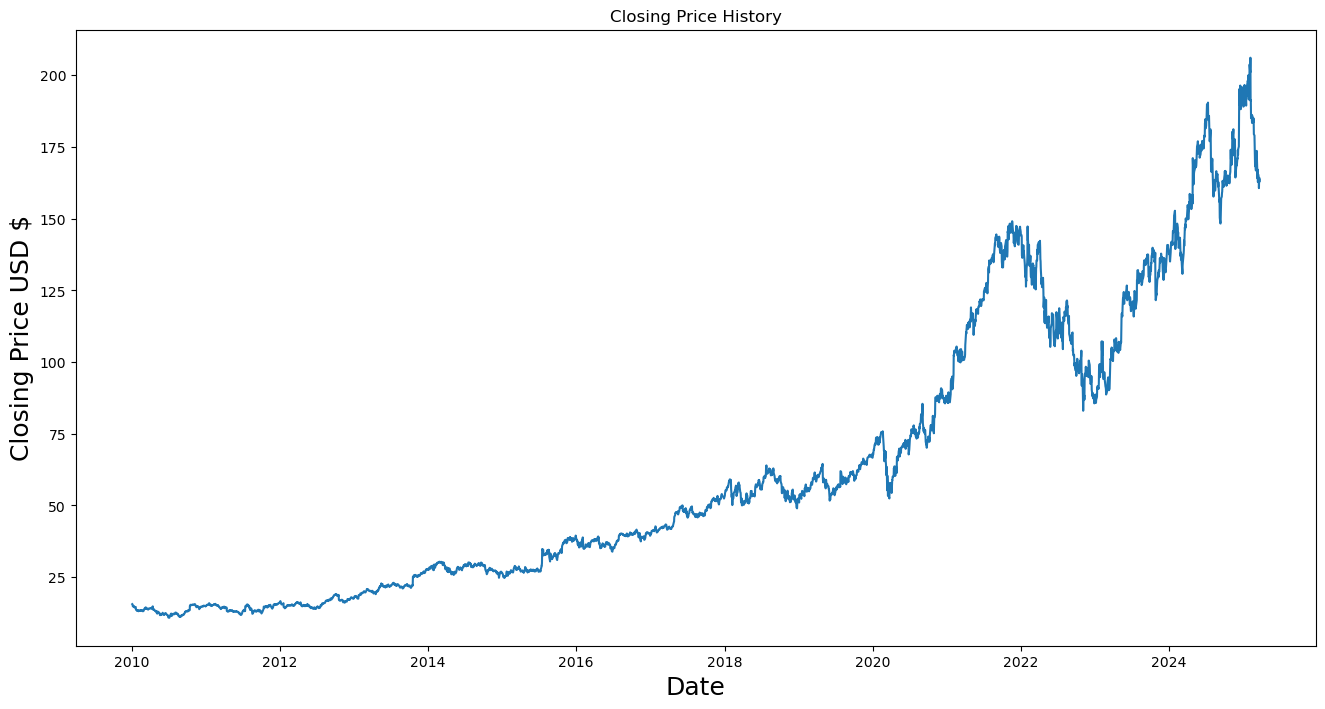

In [15]:
#Visualization of the Closing price
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(goog_hist["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price USD $", fontsize=18)
plt.show()

In [16]:
#Create a new dataframe with only the Adj Close Column
data = goog_hist.filter(["Close"])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) #This is use to train 80% of the dataset

training_data_len

3063

In [17]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
#Scaling the data means you are actually standardizing your data

array([[0.02431903],
       [0.02396703],
       [0.02196084],
       ...,
       [0.78363277],
       [0.77805111],
       [0.78414488]])

In [18]:
#Create the training model for the dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [19]:
#Reshape the data to a 3 dimensional shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
#Now you'll notice it a 3 dimensional shape

(3003, 60, 1)

In [27]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))#50 means the no of input neurons
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))# Final output  

In [28]:
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [29]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)#Batch size the number of Batch per training, while epochs is the number of Iteration

Epoch 1/5
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 59s 19ms/step - loss: 9.7345e-04
Epoch 2/5
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 3.0500e-04
Epoch 3/5
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 59s 20ms/step - loss: 1.8614e-04
Epoch 4/5
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 1.4586e-04
Epoch 5/5
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - loss: 2.2978e-04


In [31]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [33]:
#Convert the data to a numpy array
x_test = np.array(x_test)#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Evaluate the model: Getting the root square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


2.0325471466662832

In [36]:
predictions

array([[131.95699 ],
       [130.51303 ],
       [126.54156 ],
       [126.340485],
       [130.84865 ],
       [131.14397 ],
       [129.11806 ],
       [125.88239 ],
       [127.44987 ],
       [130.73611 ],
       [131.69801 ],
       [133.1554  ],
       [133.2475  ],
       [135.69897 ],
       [135.07933 ],
       [137.12843 ],
       [137.68854 ],
       [137.64934 ],
       [138.43903 ],
       [138.34181 ],
       [136.4703  ],
       [137.00902 ],
       [139.30249 ],
       [138.21211 ],
       [135.18468 ],
       [134.25449 ],
       [132.56908 ],
       [129.37526 ],
       [128.11919 ],
       [129.5117  ],
       [127.691086],
       [127.7359  ],
       [129.22035 ],
       [128.01918 ],
       [125.325294],
       [121.19271 ],
       [122.664   ],
       [120.215614],
       [116.63648 ],
       [118.62159 ],
       [116.20542 ],
       [117.02489 ],
       [117.60903 ],
       [120.774704],
       [117.37103 ],
       [115.72063 ],
       [113.2476  ],
       [114.0

C:\Users\dilly\AppData\Local\Temp\ipykernel_19176\233054307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["Predictions"] = predictions


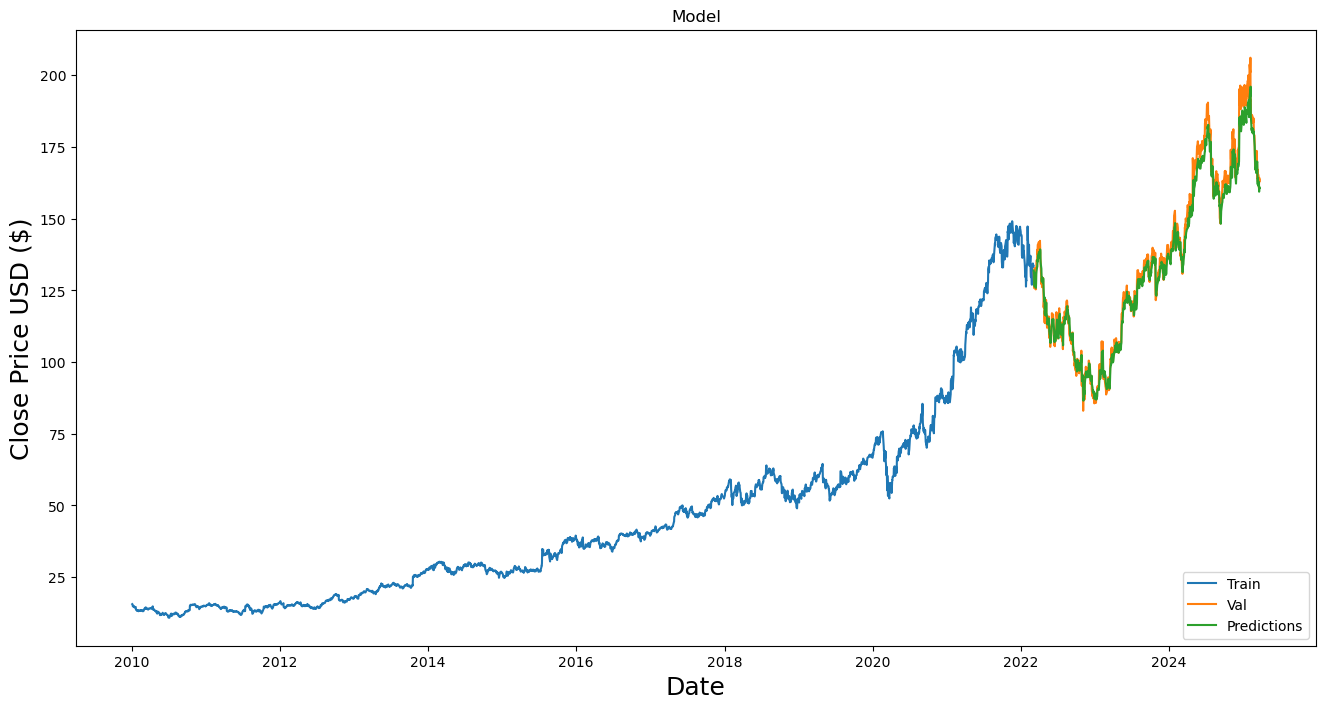

In [46]:
#Plot the data
train = data[:training_data_len]
validation = data[training_data_len:]
validation["Predictions"] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(validation[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [47]:
#Show the valid and predicted prices
validation
#This compares between the "Close" and "Predictions"

,Close,Predictions
Date,,
2022-03-04 05:00:00+00:00,131.278854,131.956985
2022-03-07 05:00:00+00:00,125.777161,130.513031
2022-03-08 05:00:00+00:00,126.499702,126.541557
2022-03-09 05:00:00+00:00,132.785156,126.340485
2022-03-10 05:00:00+00:00,131.799377,130.848648
...,...,...
2025-03-17 04:00:00+00:00,164.289993,162.897354
2025-03-18 04:00:00+00:00,160.669998,162.251236
2025-03-19 04:00:00+00:00,163.889999,159.417526


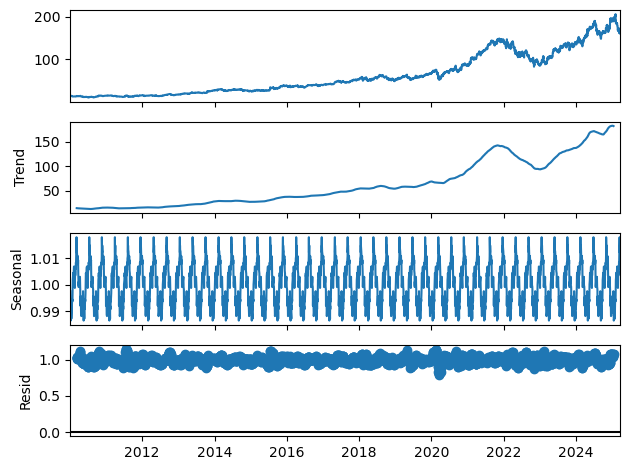

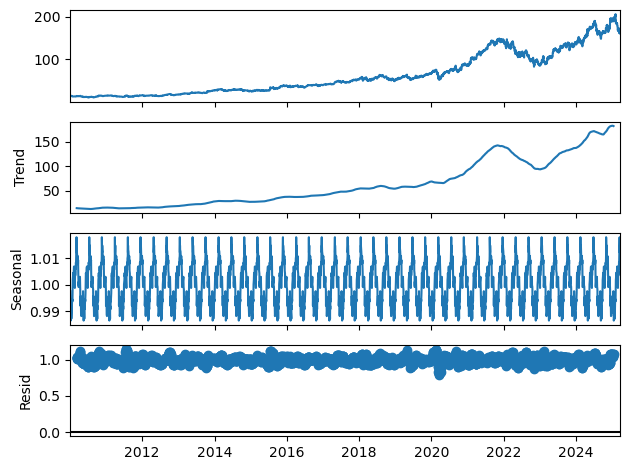

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose
#Value = Base Level x Trend x Seasonality x Error
analysis = goog_hist[['Close']]
decompose_result_mult = seasonal_decompose(analysis, model="multiplicitive",period = 90)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

Text(0.5, 1.0, 'Detrended by subtracting the trend line')

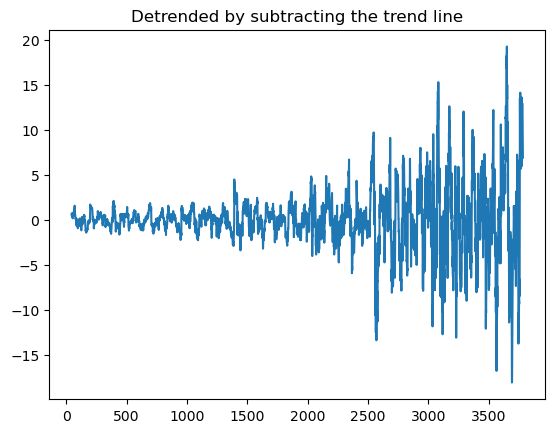

In [136]:
trend.values.shape = (trend.values.shape[0],1)
detrended = analysis.values-trend.values
plt.plot(detrended)
plt.title('Detrended by subtracting the trend line')

Text(0.5, 1.0, 'Deseasonalized by dividing the seaonsalized graph')

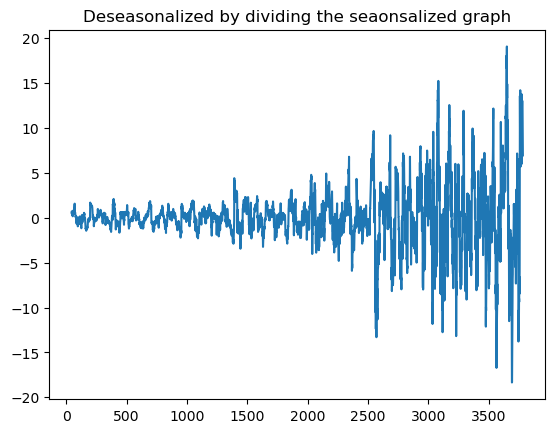

In [142]:
seasonal.values.shape = (seasonal.values.shape[0],1)
deseasonalized = detrended/seasonal.values
plt.plot(deseasonalized)

plt.title('Deseasonalized by dividing the seaonsalized graph')

Text(0.5, 1.0, 'Change from detrended to detrended and deseasonalized')

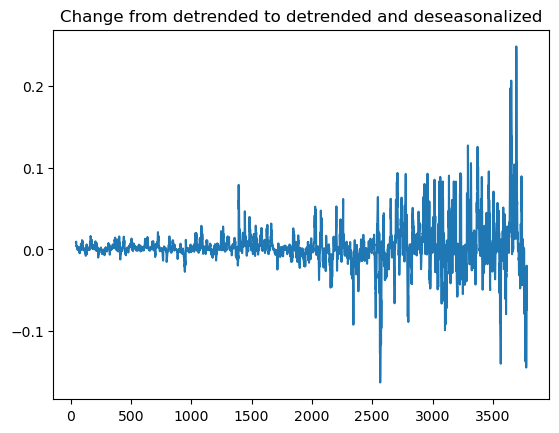

In [144]:
plt.plot(detrended-deseasonalized)
plt.title("Change from detrended to detrended and deseasonalized")